In this noteBook we will do the data visualization using the analysis sourse files


Imports & data load

 #How Python Finds Modules
When you run:

from src.ingest_data import DataIngestorFactory
Python searches through the list of paths in sys.path (its import search path) until it finds a matching package/module.

By default:

The current working directory (where you run the script) is first in the list.

But when you open a notebook in analysis/, the current working directory becomes analysis/ — not the project root.

That means:

src/ is not in the search path if we start from inside analysis/.

Without adding the root to sys.path, Python can’t find src/ or anything else outside the analysis/ folder.

2️⃣ Why analysis/ is at Project Root
We put analysis/ at the root so that:

The notebook has direct access to:

src/ (your ingestion code)

data/ (your datasets)

The import path fix:
PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))
works by simply “going up one level” from analysis/ to the project root.

If analysis/ were buried deeper (e.g., src/notebooks/analysis/), we’d have to go up two or more levels to reach the project root.

In [3]:
# --- Make project root importable from this notebook ---
import sys
from pathlib import Path

# The notebook lives in: <project>/analysis/EDA.ipynb
# So the project root is the parent of the current working dir.
PROJECT_ROOT = Path.cwd().parent

# Add project root to Python's import path once
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

# (Optional) Auto-reload modules when you edit .py files
try:
    %load_ext autoreload
    %autoreload 2
except Exception:
    pass

print("Project root on path:", PROJECT_ROOT)


Project root on path: c:\Users\msi\Downloads\Smart_Engine


 Imports & data load

In [5]:
import pandas as pd
from pathlib import Path

# bring in the ingestion code we wrote earlier
from src.ingest_data import DataIngestorFactory
# bring in analysis helpers
from analysis.analysis_src.basic_data_inspection import (
    DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy
)
from analysis.analysis_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analysis.analysis_src.univariate_analysis import (
    UnivariateAnalyzer, NumericalUnivariateAnalysis
)
from analysis.analysis_src.bivariate_analysis import (
    BivariateAnalyzer, NumericalVsNumericalAnalysis
)
from analysis.analysis_src.multivariate_analysis import SimpleMultivariateAnalysis
from analysis.analysis_src.time_series_analysis import (
    plot_sensor_over_cycles, plot_cycles_per_engine, plot_settings_relationship
)

# Use the project root we defined above
input_path = PROJECT_ROOT / "data" / "raw" / "archive.zip"   # or extracted folder
subset = "FD001"

ingestor = DataIngestorFactory.get_data_ingestor(input_path)
ds = ingestor.ingest(input_path, subset=subset, verbose=True)

train, test, rul_truth = ds.train.copy(), ds.test.copy(), ds.rul_truth.copy()
train.head()



🔎 ZIP ingestion from: c:\Users\msi\Downloads\Smart_Engine\data\raw\archive.zip
📦 Members to extract: ['CMaps/train_FD001.txt', 'CMaps/test_FD001.txt', 'CMaps/RUL_FD001.txt']
✅ Extracted to: c:\Users\msi\Downloads\Smart_Engine\data\raw\extracted_FD001\CMaps
📂 Directory ingestion from: c:\Users\msi\Downloads\Smart_Engine\data\raw\extracted_FD001\CMaps
✅ Loaded:
   train: c:\Users\msi\Downloads\Smart_Engine\data\raw\extracted_FD001\CMaps\train_FD001.txt
   test : c:\Users\msi\Downloads\Smart_Engine\data\raw\extracted_FD001\CMaps\test_FD001.txt
   RUL  : c:\Users\msi\Downloads\Smart_Engine\data\raw\extracted_FD001\CMaps\RUL_FD001.txt


,engine_id,cycle,setting_1,setting_2,setting_3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


Basic Inspection


In [9]:
inspector = DataInspector(DataTypesInspectionStrategy())
inspector.execute_inspection(train)  # dtypes, non-null counts

inspector.set_strategy(SummaryStatisticsInspectionStrategy())
inspector.execute_inspection(train)  # summary stats



[Data Types & Non-Null Counts]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   engine_id  20631 non-null  int64  
 1   cycle      20631 non-null  int64  
 2   setting_1  20631 non-null  float64
 3   setting_2  20631 non-null  float64
 4   setting_3  20631 non-null  float64
 5   s1         20631 non-null  float64
 6   s2         20631 non-null  float64
 7   s3         20631 non-null  float64
 8   s4         20631 non-null  float64
 9   s5         20631 non-null  float64
 10  s6         20631 non-null  float64
 11  s7         20631 non-null  float64
 12  s8         20631 non-null  float64
 13  s9         20631 non-null  float64
 14  s10        20631 non-null  float64
 15  s11        20631 non-null  float64
 16  s12        20631 non-null  float64
 17  s13        20631 non-null  float64
 18  s14        20631 non-null  float64
 19  s15        206

In [20]:
train.mean()

engine_id      51.506568
cycle         108.807862
setting_1      -0.000009
setting_2       0.000002
setting_3     100.000000
s1            518.670000
s2            642.680934
s3           1590.523119
s4           1408.933782
s5             14.620000
s6             21.609803
s7            553.367711
s8           2388.096652
s9           9065.242941
s10             1.300000
s11            47.541168
s12           521.413470
s13          2388.096152
s14          8143.752722
s15             8.442146
s16             0.030000
s17           393.210654
s18          2388.000000
s19           100.000000
s20            38.816271
s21            23.289705
dtype: float64

Missing values


[Missing Values by Column]
Series([], dtype: int64)

[Heatmap of Missing Values]


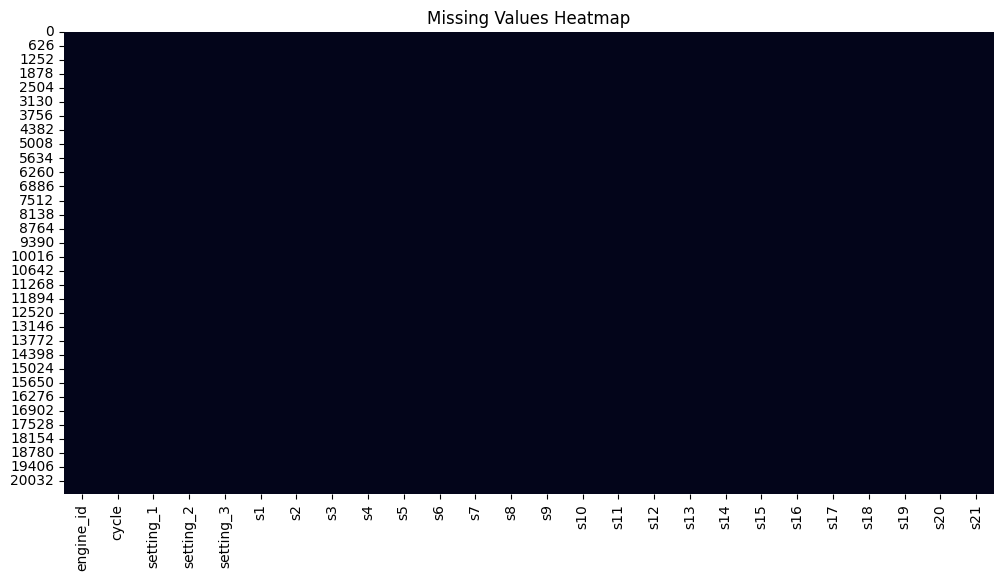

In [10]:
missing = SimpleMissingValuesAnalysis()
missing.analyze(train)


Univariate (sensor distribution)

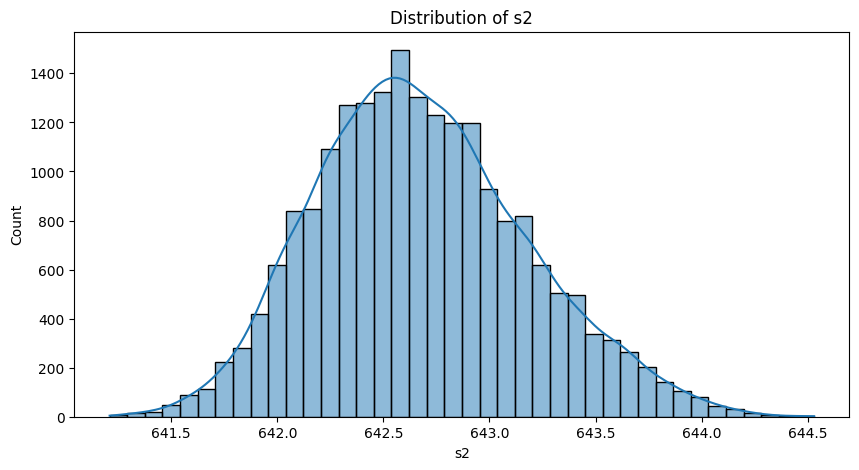

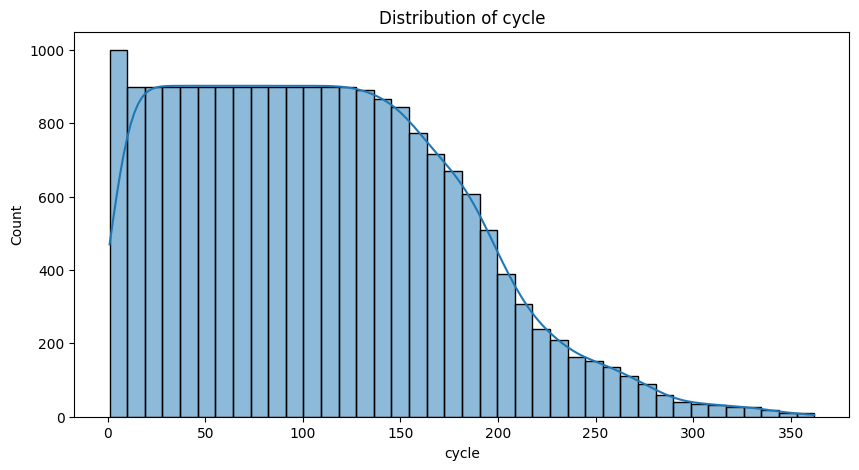

In [11]:
uni = UnivariateAnalyzer(NumericalUnivariateAnalysis())
uni.execute_analysis(train, "s2")     # change sensor name as needed
uni.execute_analysis(train, "cycle")  # distribution of cycle values


1. **Univariate Analysis**
* Definition: Looks at one variable at a time.

* Goal: Understand its distribution, central tendency (mean, median), spread (variance, standard deviation), and shape (skewness, kurtosis).

* Example (CMAPSS): Plotting a histogram of sensor_11 values to see how they’re distributed across all cycles.

* Common tools:

        * Histograms

        * Box plots

        * Summary statistics

 Bivariate (sensor vs cycle)

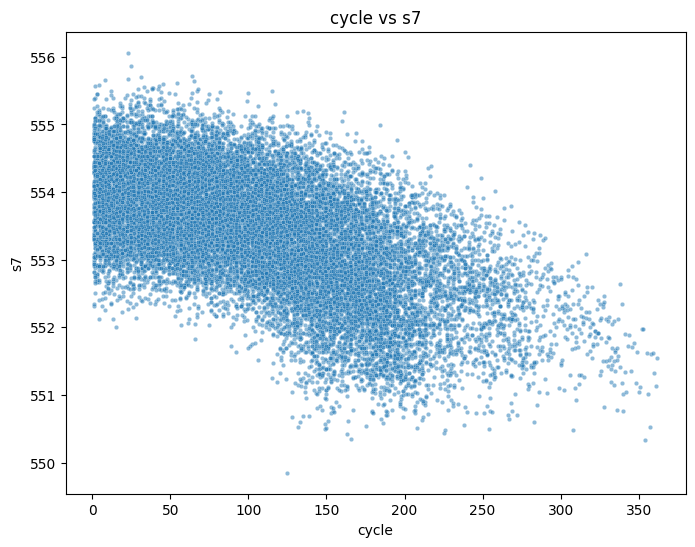

In [12]:
bi = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bi.execute_analysis(train, "cycle", "s7")  # how sensor s7 evolves with cycle (all engines)


2. **Bivariate Analysis**
* Definition: Looks at two variables together to explore relationships or differences.

* Goal: See if they’re correlated, if one influences the other, or how they vary together.

* Example (CMAPSS): Scatter plot of sensor_11 vs. Remaining Useful Life (RUL) to check if higher sensor readings mean shorter life.

* Common tools:

        Scatter plots

        Correlation coefficients (Pearson, Spearman)

        Two-variable cross-tabulation

Multivariate (correlations)

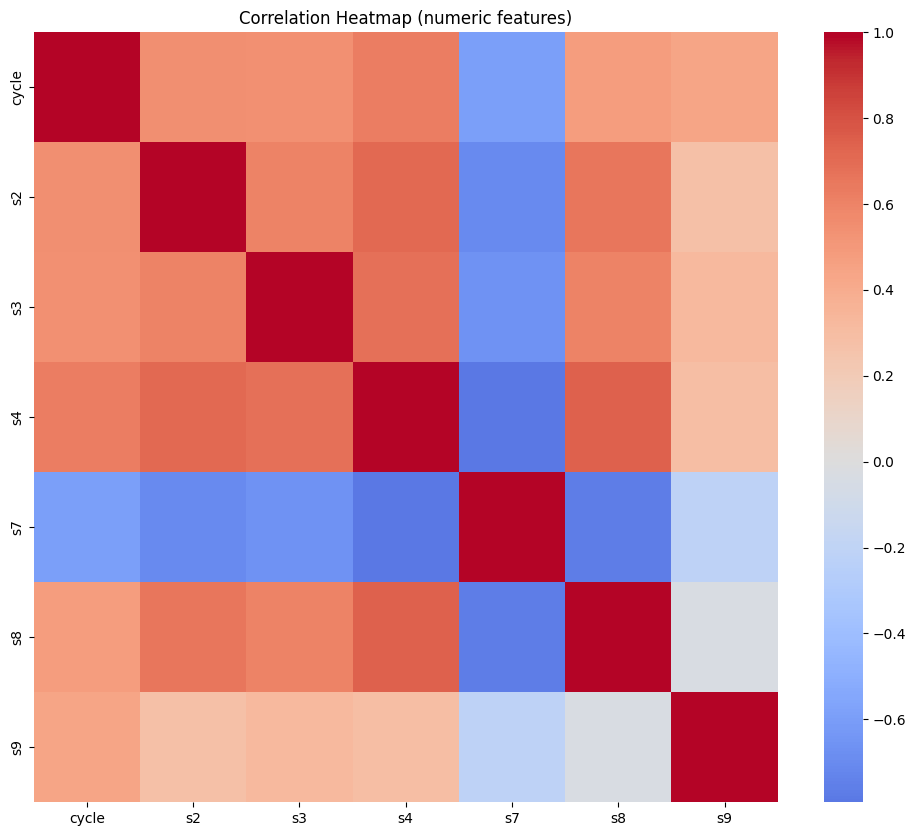

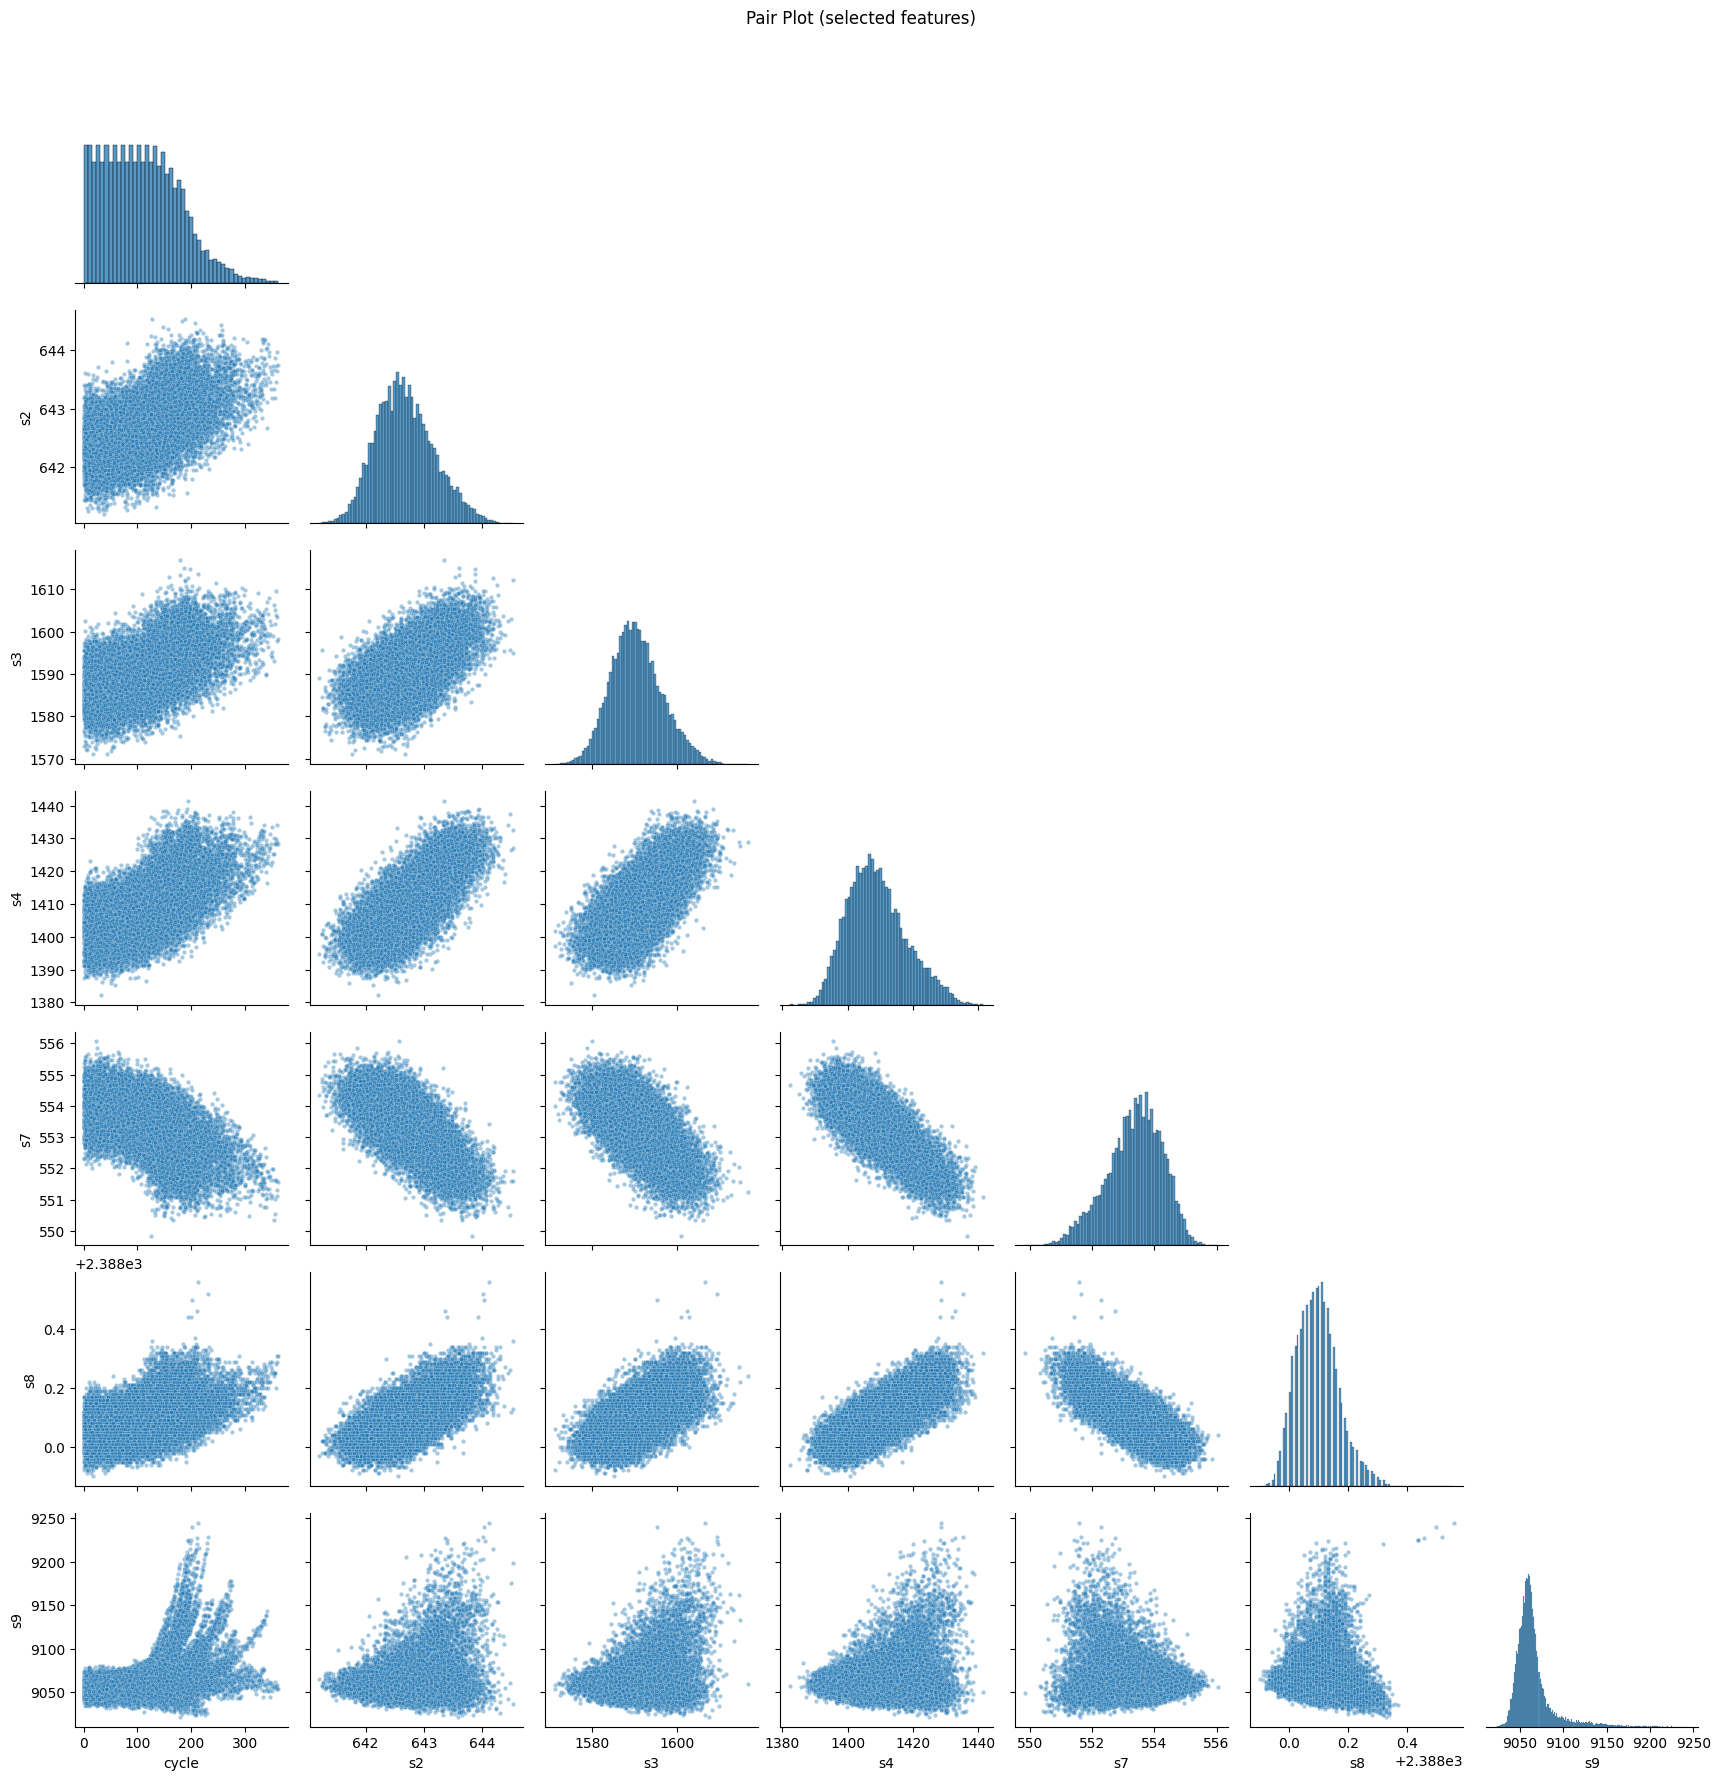

In [13]:
multi = SimpleMultivariateAnalysis()
# keep a small set to keep plots readable
cols = ["cycle"] + [f"s{i}" for i in [2,3,4,7,8,9]]
multi.analyze(train[cols])


3. **Multivariate Analysis**
* Definition: Looks at three or more variables simultaneously.

* Goal: Understand complex relationships, interactions, or patterns across multiple variables.

* Example (CMAPSS): Using sensor_11, sensor_4, and operational settings together in a multiple regression model to predict RUL.

* Common tools:

        Multiple regression

        Principal Component Analysis (PCA)

        Cluster analysis

        Multivariate time series models

**Quick analogy:**

Univariate: “How is this plant growing?” 🌱

Bivariate: “Does sunshine affect this plant’s growth?” 🌱☀️

Multivariate: “How do sunshine, water, and soil nutrients together affect this plant’s growth?” 🌱☀️💧🌾



Time-series specific

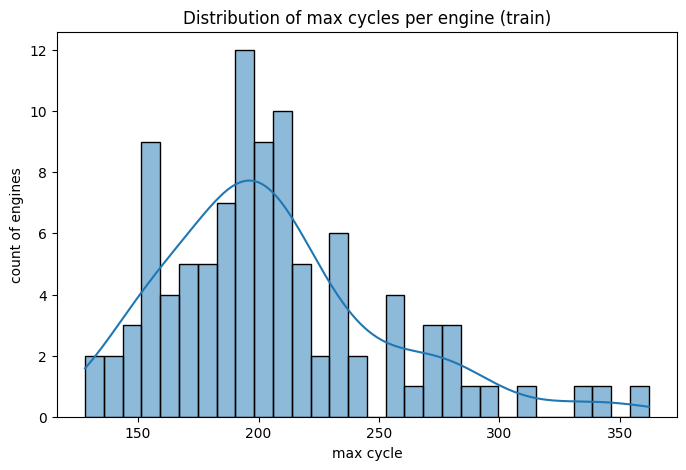

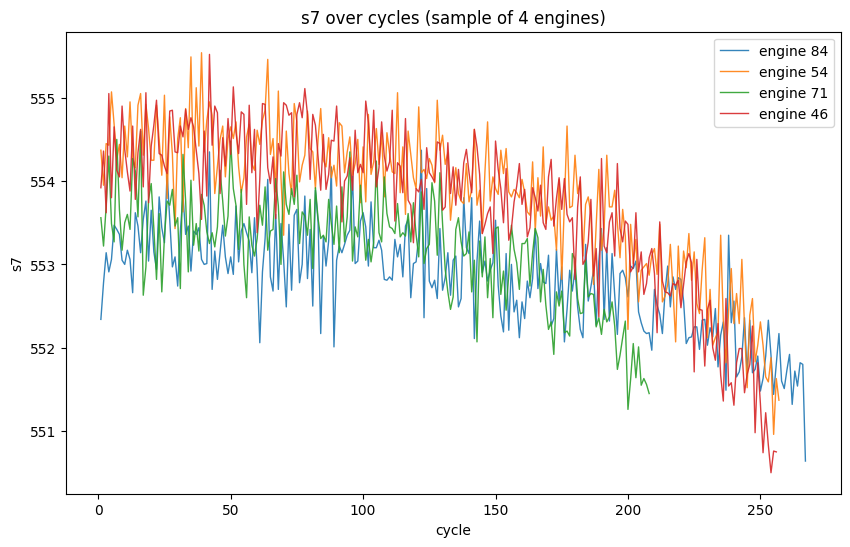

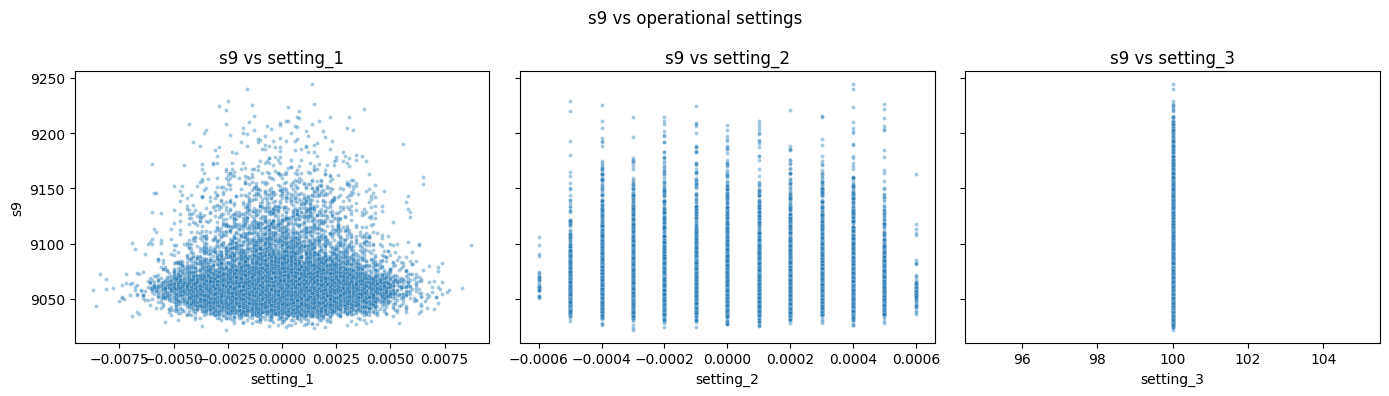

In [14]:
plot_cycles_per_engine(train)           # distribution of engine lifetimes
plot_sensor_over_cycles(train, "s7")    # per-engine sensor trace
plot_settings_relationship(train, "s9") # sensor vs settings 1..3


Survival Curve Per Engine

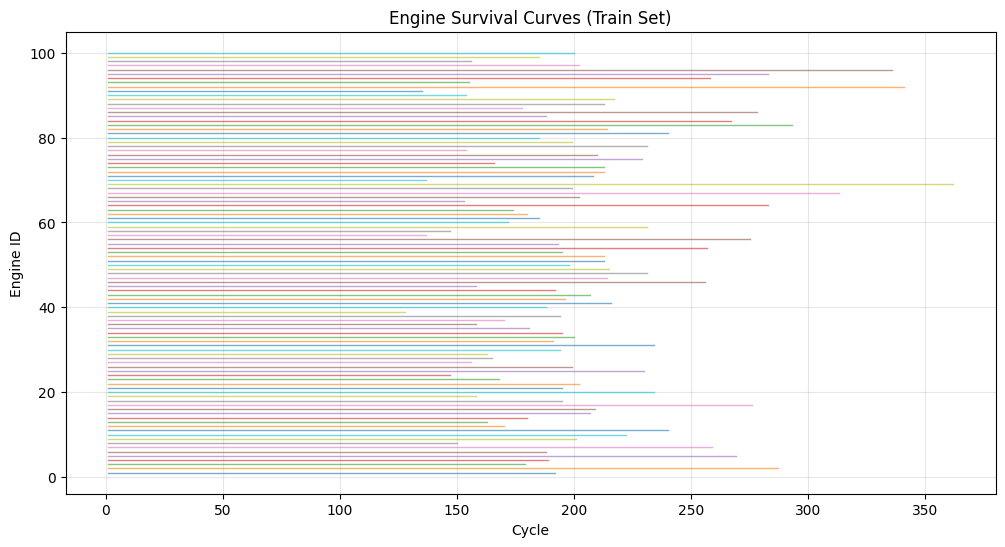

In [ ]:
import matplotlib.pyplot as plt

# Each engine's cycle progression
plt.figure(figsize=(12, 6))

# Plot each engine as a line: cycle from 1 to max cycle
for eid, group in train.groupby("engine_id"):
    plt.plot(group["cycle"], [eid] * len(group), alpha=0.6, linewidth=1)

plt.xlabel("Cycle")
plt.ylabel("Engine ID")
plt.title("Engine Survival Curves (Train Set)")
plt.grid(True, alpha=0.3)
plt.show()


sorted:

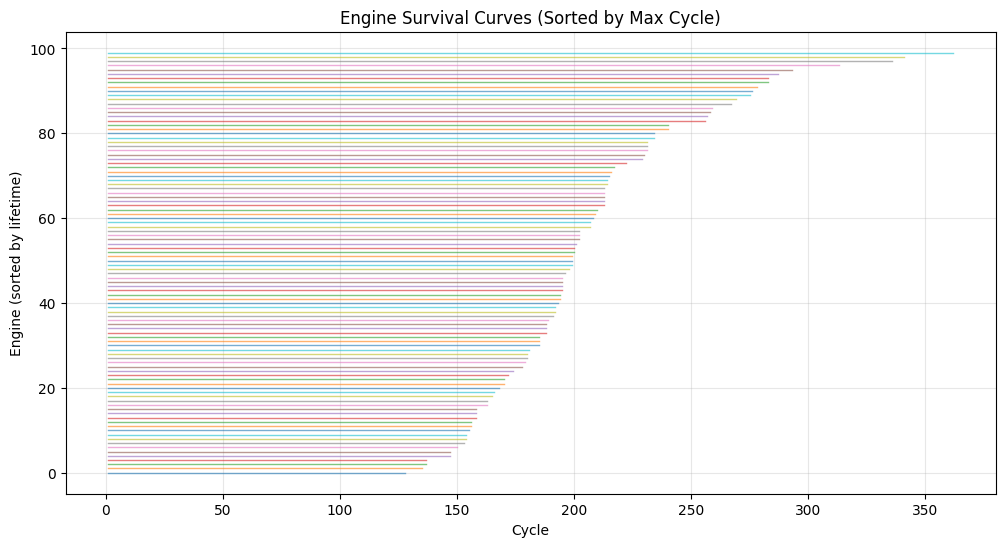

In [16]:
engine_lifetimes = train.groupby("engine_id")["cycle"].max().sort_values()
sorted_ids = engine_lifetimes.index.tolist()

plt.figure(figsize=(12, 6))
for idx, eid in enumerate(sorted_ids):
    cycles = train.loc[train["engine_id"] == eid, "cycle"]
    plt.plot(cycles, [idx] * len(cycles), alpha=0.6, linewidth=1)

plt.xlabel("Cycle")
plt.ylabel("Engine (sorted by lifetime)")
plt.title("Engine Survival Curves (Sorted by Max Cycle)")
plt.grid(True, alpha=0.3)
plt.show()
